Visualisation du Système Fondamental de Voisinages avec Matplotlib et Seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Polygon

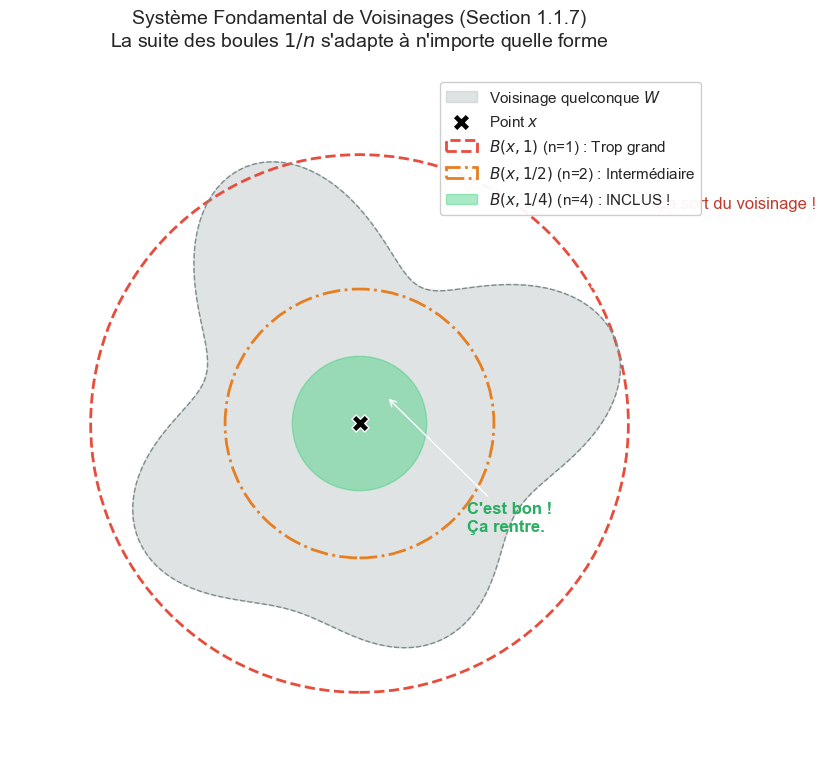

In [3]:
# 1. Activer le style Seaborn pour un rendu moderne
sns.set_theme(style="whitegrid", palette="deep")

def visualiser_systeme_fondamental_seaborn():
    # Création de la figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # -------------------------------------------------------
    # 1. Créer une forme irrégulière pour le Voisinage W
    # -------------------------------------------------------
    # On génère des points pour faire une "patate"
    theta = np.linspace(0, 2*np.pi, 200)
    # Le rayon varie pour créer des creux et des bosses
    r = 0.8 + 0.15 * np.sin(4 * theta) + 0.1 * np.cos(3 * theta)
    x_poly = r * np.cos(theta)
    y_poly = r * np.sin(theta)

    # On dessine la zone grise (Le voisinage quelconque)
    ax.fill(x_poly, y_poly, color='#95a5a6', alpha=0.3, label='Voisinage quelconque $W$')
    ax.plot(x_poly, y_poly, color='#7f8c8d', linestyle='--', linewidth=1)

    # -------------------------------------------------------
    # 2. Le Centre x (avec Seaborn scatterplot)
    # -------------------------------------------------------
    # On utilise seaborn pour tracer le point central
    sns.scatterplot(x=[0], y=[0], color='black', s=150, marker='X', label='Point $x$', zorder=10)

    # -------------------------------------------------------
    # 3. Les Boules B(x, 1/n) du système fondamental
    # -------------------------------------------------------

    # n=1 : Rayon 1.0 (Trop grand, déborde)
    c1 = Circle((0, 0), 1.0, edgecolor='#e74c3c', facecolor='none',
                linestyle='--', linewidth=2, label='$B(x, 1)$ (n=1) : Trop grand')
    ax.add_patch(c1)

    # n=2 : Rayon 0.5 (Rentre presque ou juste)
    c2 = Circle((0, 0), 0.5, edgecolor='#e67e22', facecolor='none',
                linestyle='-.', linewidth=2, label='$B(x, 1/2)$ (n=2) : Intermédiaire')
    ax.add_patch(c2)

    # n=4 : Rayon 0.25 (Rentre largement !)
    # On la remplit pour montrer la sécurité
    c3 = Circle((0, 0), 0.25, color='#2ecc71', alpha=0.4,
                label='$B(x, 1/4)$ (n=4) : INCLUS !')
    ax.add_patch(c3)

    # -------------------------------------------------------
    # 4. Annotations et Style
    # -------------------------------------------------------
    # Flèche pour montrer le débordement
    ax.annotate("Ça sort du voisinage !", xy=(0.85, 0.5), xytext=(1.1, 0.8),
                arrowprops=dict(facecolor='#e74c3c', arrowstyle='->'), color='#c0392b')

    # Flèche pour montrer l'inclusion
    ax.annotate("C'est bon !\nÇa rentre.", xy=(0.1, 0.1), xytext=(0.4, -0.4),
                arrowprops=dict(facecolor='#2ecc71', arrowstyle='->'), color='#27ae60', fontweight='bold')

    ax.set_aspect('equal')
    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)

    plt.title("Système Fondamental de Voisinages (Section 1.1.7)\nLa suite des boules $1/n$ s'adapte à n'importe quelle forme", fontsize=14, pad=20)
    plt.legend(loc='upper right', framealpha=0.95)

    # Nettoyer les axes (style Tufte/Seaborn)
    sns.despine(left=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.tight_layout()
    plt.show()

visualiser_systeme_fondamental_seaborn()